In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

from utils import get_random_spectra

In [2]:
np.repeat(np.random.randint(30, 250, 4), 3)

array([ 94,  94,  94,  99,  99,  99, 225, 225, 225, 103, 103, 103])

In [3]:
np.logspace(0, 4, 20, dtype=int)[5:]

array([   11,    18,    29,    48,    78,   127,   206,   335,   545,
         885,  1438,  2335,  3792,  6158, 10000])

In [14]:
# nmut = 1000

data = []
spectra = []
for nmut in np.logspace(0, 4, 20, dtype=int)[5:]:
    ms12raw = get_random_spectra(1).rename(columns={'MutSpec': 'MutSpecInit'})
    nuc_cont = np.repeat(np.random.randint(30, 250, 4), 3)
    ms12 = ms12raw.copy()
    ms12['ExpNum'] = nuc_cont
    ms12['ObsNum'] = ms12['MutSpecInit'] * ms12['ExpNum']
    ms12['ObsNum'] = (ms12['ObsNum']/ms12['ObsNum'].sum() * nmut)
    ms12['MutSpec'] = ms12['ObsNum'] / ms12['ExpNum']
    ms12['MutSpec'] /= ms12['MutSpec'].sum()
    ms12['Rate'] = (ms12['ObsNum'] / ms12['ObsNum'].sum()) / (ms12['ExpNum'] / ms12['ExpNum'].sum())
    spectra.append(ms12.assign(nmut=nmut))

    scaler_ms = (ms12['ObsNum'] / ms12['ExpNum']).sum()
    scaler_rate = ms12['ObsNum'].sum() / ms12['ExpNum'].sum()

    cossim = 1 - cosine(ms12['Rate'], ms12['MutSpec'])
    diff = ms12['MutSpec'] - (ms12['Rate'] / ms12['Rate'].sum())

    ms_cttc = ms12.query('Mut == "C>T"').MutSpec.item() / ms12.query('Mut == "G>A"').MutSpec.item()
    rate_cttc = ms12.query('Mut == "C>T"').Rate.item() / ms12.query('Mut == "G>A"').Rate.item()
    
    data.append({
        'nmut': nmut,
        'scaler_ms': scaler_ms,
        'scaler_rate': scaler_rate,
        'cossim': cossim,
        'diff': diff.sum(),
        'ms_cttc': ms_cttc,
        'rate_cttc': rate_cttc,
        'rate_sum': ms12['Rate'].sum(),
    })
    # break
spectra = pd.concat(spectra)
df = pd.DataFrame(data)
df['scaler_ratio'] = df['scaler_ms'] / df['scaler_rate']

df

,nmut,scaler_ms,scaler_rate,cossim,diff,ms_cttc,rate_cttc,rate_sum,scaler_ratio
0,11,0.092546,0.007591,1.0,-3.937822e-16,7.588626,7.588626,12.190857,12.190857
1,18,0.138834,0.011407,1.0,3.314135e-16,0.878342,0.878342,12.171106,12.171106
2,29,0.253326,0.025916,1.0,7.654467e-17,1.733071,1.733071,9.774876,9.774876
3,48,0.365190,0.028725,1.0,-1.214306e-17,0.053875,0.053875,12.713160,12.713160
4,78,0.520933,0.044369,1.0,-5.030698e-17,0.918407,0.918407,11.741036,11.741036
5,127,1.054054,0.086749,1.0,1.825796e-16,0.773238,0.773238,12.150674,12.150674
6,206,1.068584,0.088260,1.0,-8.500145e-17,4.737621,4.737621,12.107156,12.107156
7,335,2.527383,0.224681,1.0,4.163336e-17,0.964731,0.964731,11.248740,11.248740
8,545,6.761591,0.573081,1.0,-2.224783e-16,1.012902,1.012902,11.798666,11.798666
9,885,13.092164,0.605749,1.0,1.283695e-16,1.084716,1.084716,21.613166,21.613166


<Axes: xlabel='scaler_ms', ylabel='scaler_rate'>

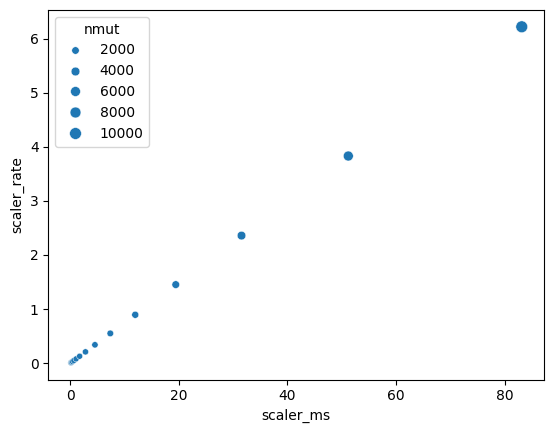

In [7]:
sns.scatterplot(data=df, x='scaler_ms', y='scaler_rate', size='nmut')
# plt.xscale('log')
# plt.yscale('log')

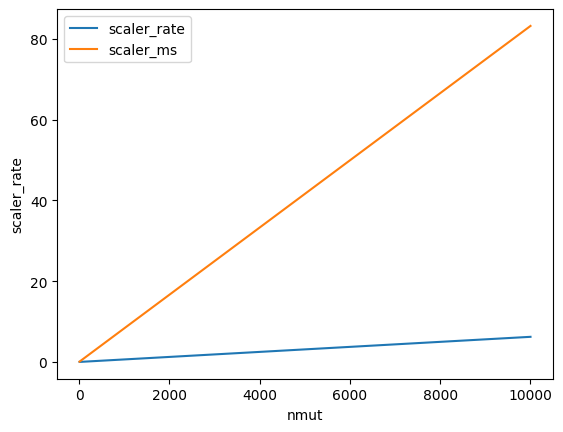

In [9]:
sns.lineplot(data=df, x='nmut', y='scaler_rate', label='scaler_rate')
sns.lineplot(data=df, x='nmut', y='scaler_ms', label='scaler_ms')
plt.legend()

In [59]:
spectra.pivot(index='nmut', columns='Mut', values='Rate')

Mut,A>C,A>G,A>T,C>A,C>G,C>T,G>A,G>C,G>T,T>A,T>C,T>G
nmut,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,0.140683,3.657770,0.070342,0.123684,0.123684,3.463158,1.224091,0.153011,0.153011,0.000000,0.000000,0.000000
200,0.137783,3.582352,0.103337,0.121134,0.121134,3.391753,1.198852,0.224785,0.149857,0.173049,0.173049,0.000000
300,0.136842,3.557899,0.114035,0.120307,0.160410,3.368601,1.190669,0.198445,0.148834,0.229157,0.229157,0.000000
400,0.152259,3.518867,0.118423,0.148734,0.148734,3.331646,1.177607,0.220801,0.147201,0.254973,0.254973,0.084991
...,...,...,...,...,...,...,...,...,...,...,...,...
9600,0.154613,3.489925,0.130237,0.154299,0.164096,3.302736,1.165008,0.222700,0.157556,0.311397,0.297402,0.083972
9700,0.155102,3.490130,0.130285,0.153935,0.164844,3.302945,1.165106,0.221925,0.157447,0.311680,0.294365,0.083115
9800,0.154898,3.490330,0.130333,0.154779,0.164378,3.303150,1.165202,0.222650,0.157339,0.308529,0.294817,0.082275


In [15]:
spectra.pivot(index='nmut', columns='Mut', values='Rate').reset_index().corr().loc['nmut']

Mut
nmut    1.000000
A>C     0.016992
A>G    -0.052959
A>T    -0.410892
C>A    -0.309534
C>G    -0.087080
C>T     0.139525
G>A    -0.152553
G>C     0.134438
G>T     0.157769
T>A     0.061234
T>C    -0.070856
T>G     0.085079
Name: nmut, dtype: float64

In [16]:
spectra.pivot(index='nmut', columns='Mut', values='MutSpec').reset_index().corr().loc['nmut']

Mut
nmut    1.000000
A>C     0.064605
A>G    -0.057195
A>T    -0.458926
C>A    -0.341461
C>G    -0.064402
C>T     0.250058
G>A    -0.178859
G>C     0.197351
G>T     0.184533
T>A     0.089395
T>C    -0.035546
T>G     0.076825
Name: nmut, dtype: float64